pada dataset DukuhKupang 
penggunaan digunakan 3 metode clusteirng yakni k means , hirarticalk clusteirng dan db scan,

pada metode k means didapat
score Silhouette Score: 0.337501056485859
Davies-Bouldin Index: 1.030346354353812
pada k = 3
dengan rincihan vluasisasi sebgaia beirkut 

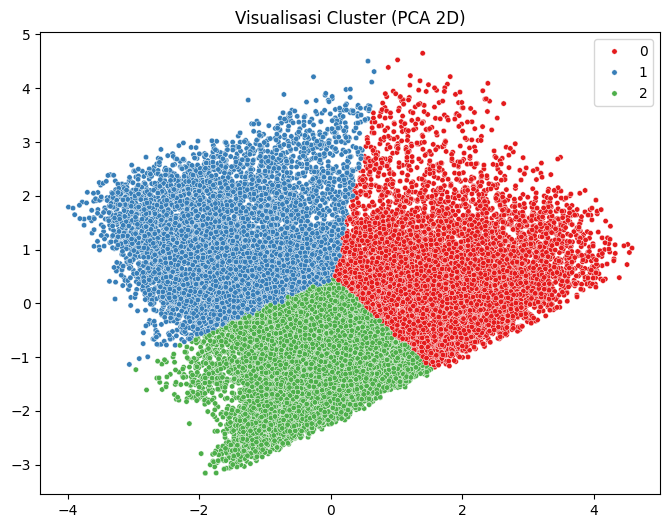

namun dalam penggunaan cluster dalam proses klasifikasi dinilai masih blum bisa diralisasikan karena score Silhouette Score belom mencapai 0.5 hasl ini menyebabkan pembagian catgeori pada tiap cluster tidak merata sehingga apabila cluster diguankan sebagai model hasilnya tidak akan optimal atau tidak akan dapat memprediksi sesuai dengan keadaan sebagai mana mestinya gamabr tersebut dapat dilihat pada bgambar beirkut

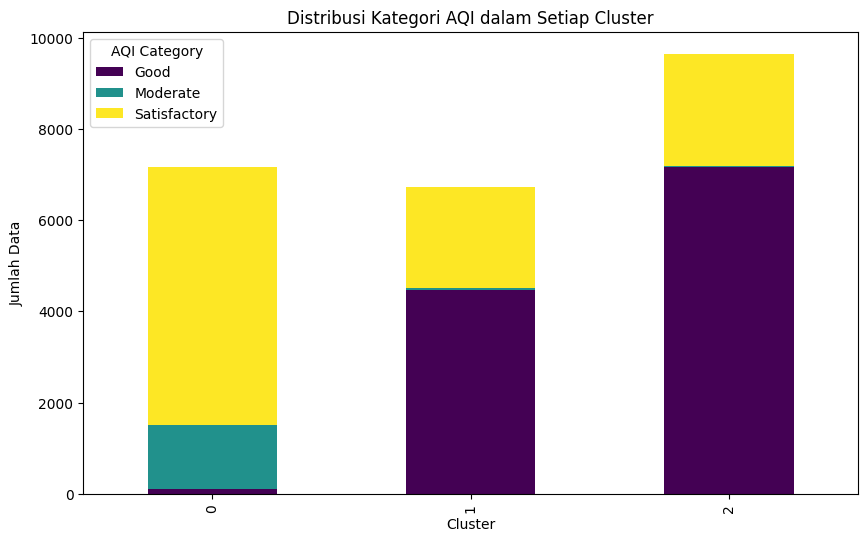

pada analsisi metode dbscan 

🔥 Best Config:
eps=0.6000000000000001, min_samples=9, silhouette=0.223, DBI=1.721

hasil ini menghasilkan 
Silhouette Score: 0.22260500001393907
Davies-Bouldin Index: 1.7212721500029777

tentu ini masih belom layak untuk dijadikan cluster sebagai label untuk dilajutkan dalma proses klasifikasi yang notabene minimal hasur mencpai Silhouette Score: 0.5

pada ga,bar 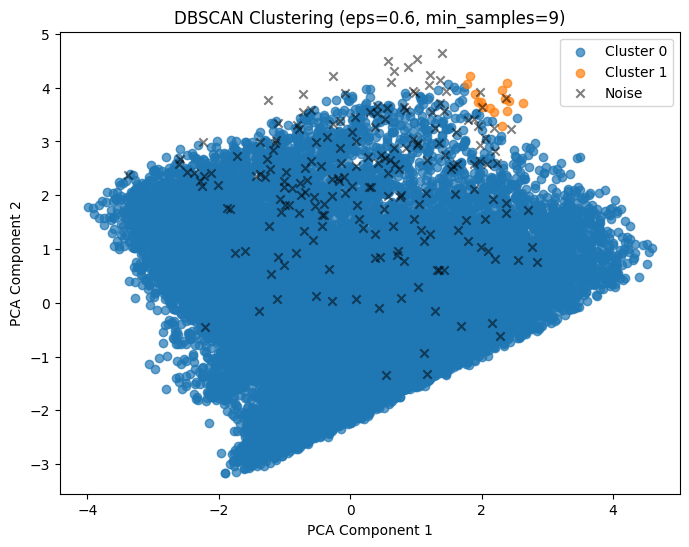 cluster 1 malah hanya medapatkan 15 angka saja didominasi cluster 0 dan -1 selain itu terlalu banyak noise yang ada dalma dbscan 

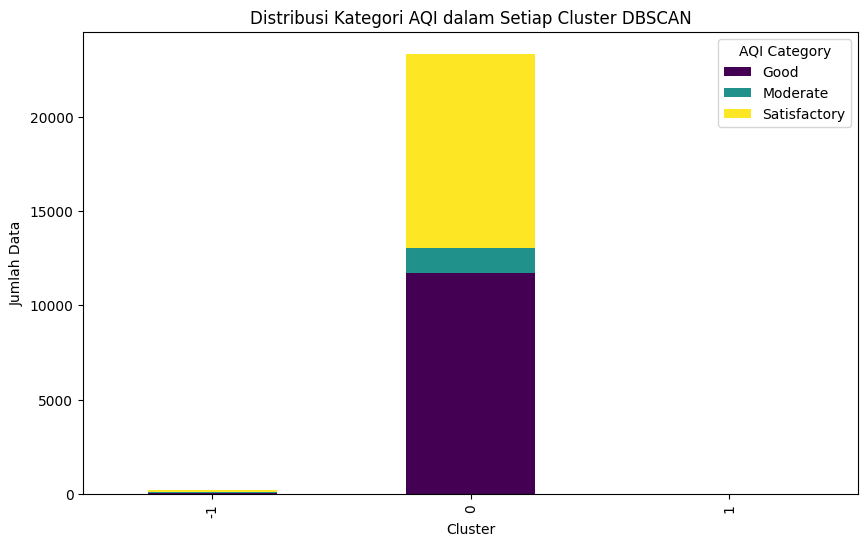

berdasarakan pengelompakan ya tentu didominasi oleh cluster o dan itu saja tidak seimbang pad a pembagian kelasnya didominasi kelasi good

pada hirartical clustering
Jumlah cluster optimal berdasarkan Silhouette Score: 3
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Range jumlah cluster yang diuji
cluster_range = range(2, 11)  # bisa diatur sesuai kebutuhan

silhouette_scores = {}

# Loop dengan tqdm
for n_clusters in tqdm(cluster_range, desc="Evaluating clusters", unit="cluster"):
    ahc = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = ahc.fit_predict(X_train_scaled)
    score = silhouette_score(X_train_scaled, labels)
    print(f"n_cluster = {n_clusters} Silhouette Score = {score}")
    silhouette_scores[n_clusters] = score

# Cari jumlah cluster optimal
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)

print("\n--- Analisis Silhouette Score ---")
for n, score in silhouette_scores.items():
    print(f"Jumlah cluster {n}: Silhouette Score = {score:.4f}")

print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_clusters}")
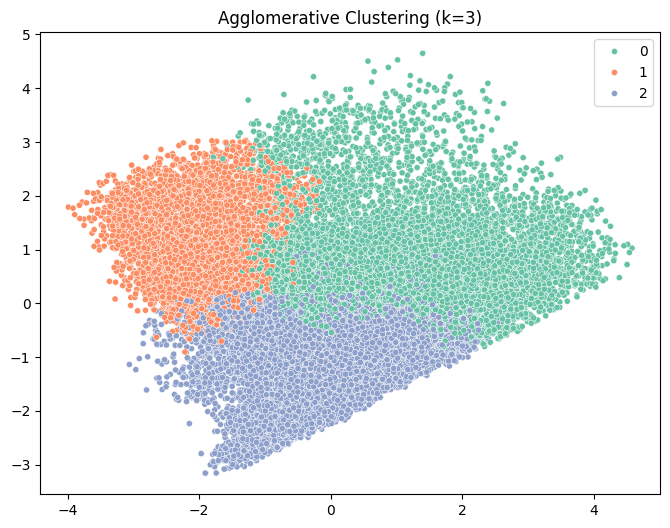

AQI_Category  Good  Moderate  Satisfactory
Cluster_AHC                               
0              780      1431          5904
1             3676         1           851
2             7307         9          3597

Oke 👍 aku bantu rapikan jadi **narasi analisis ilmiah** dengan bahasa Indonesia yang jelas, terstruktur, dan mudah dipahami. Aku susun per metode (K-Means, DBSCAN, dan Hierarchical), kemudian aku tarik kesimpulan umum di akhir.

---

## 📌 Analisis Clustering pada Dataset Dukuh Kupang

### 1. Metode K-Means

Eksperimen K-Means dilakukan dengan variasi jumlah cluster mulai dari *k=3* hingga *k=10*. Nilai **Silhouette Score tertinggi** diperoleh pada *k=3* dengan skor **0,3375** dan **Davies-Bouldin Index (DBI) = 1,03**.

Hasil ini menunjukkan bahwa kualitas pemisahan cluster masih tergolong **rendah** karena nilai Silhouette Score idealnya ≥0,5 agar struktur cluster dapat dianggap baik.

Distribusi kategori AQI pada *k=3* terlihat pada tabel berikut:

| Cluster | Good  | Moderate | Satisfactory |
| ------- | ----- | -------- | ------------ |
| 0       | 108   | 1.396    | 5.669        |
| 1       | 4.479 | 43       | 2.215        |
| 2       | 7.176 | 2        | 2.468        |

Dari tabel di atas terlihat bahwa pembagian kategori tidak merata. Cluster 1 dan 2 didominasi oleh kategori *Good*, sementara cluster 0 didominasi oleh *Satisfactory*. Visualisasi scatter plot PCA juga memperlihatkan masih adanya tumpang tindih antar cluster.

📌 **Interpretasi:**
Hasil clustering K-Means belum layak digunakan sebagai label untuk klasifikasi karena:

* Nilai Silhouette Score <0,5.
* Distribusi kategori per cluster tidak seimbang.

---

### 2. Metode DBSCAN

Pada metode DBSCAN, parameter terbaik diperoleh pada **eps=0,6** dan **min\_samples=9** dengan hasil:

* **Silhouette Score = 0,223**
* **Davies-Bouldin Index = 1,72**

Nilai Silhouette Score ini bahkan lebih rendah dibandingkan K-Means, sehingga kualitas cluster makin buruk.

Distribusi hasil cluster terhadap kategori AQI:

| Cluster    | Good   | Moderate | Satisfactory |
| ---------- | ------ | -------- | ------------ |
| -1 (Noise) | 31     | 84       | 82           |
| 0          | 11.732 | 1.342    | 10.270       |
| 1          | 0      | 15       | 0            |

Visualisasi menunjukkan bahwa sebagian besar data masuk ke dalam **cluster 0**, sementara cluster 1 hanya berisi 15 data poin. Selain itu, terdapat banyak sekali data yang dikategorikan sebagai **noise** (-1).

📌 **Interpretasi:**
DBSCAN gagal menghasilkan pemisahan cluster yang bermakna karena:

* Mayoritas data hanya terkumpul di satu cluster.
* Terlalu banyak data yang dikategorikan sebagai noise.
* Distribusi cluster tidak seimbang.

---

### 3. Metode Hierarchical Clustering (Agglomerative)

Pengujian dengan variasi jumlah cluster menunjukkan bahwa **jumlah cluster optimal adalah 3**, dengan nilai Silhouette Score tertinggi dibanding opsi jumlah cluster lain. Namun demikian, nilainya tetap rendah (<0,5) sehingga kualitas cluster masih belum memadai.

Distribusi kategori AQI terhadap hasil cluster adalah:

| Cluster | Good  | Moderate | Satisfactory |
| ------- | ----- | -------- | ------------ |
| 0       | 780   | 1.431    | 5.904        |
| 1       | 3.676 | 1        | 851          |
| 2       | 7.307 | 9        | 3.597        |

Hasil ini memperlihatkan pola yang serupa dengan K-Means, di mana ada cluster yang didominasi *Satisfactory* dan cluster lain didominasi *Good*.

📌 **Interpretasi:**
Walaupun metode ini memberikan hasil yang sedikit lebih stabil dibanding DBSCAN, kualitas clustering masih belum dapat dikatakan baik.

---

Oke 👍 biar lebih jelas, aku tambahkan tabel perbandingan **Silhouette Score** dan **Davies-Bouldin Index (DBI)** untuk ketiga metode clustering. Dengan begitu hasilnya bisa langsung dibandingkan.

---

Mantap 👍, aku tambahkan **standar kualitas umum** untuk **Silhouette Score** dan **Davies-Bouldin Index (DBI)** biar tabelnya lebih informatif.

---

## 📊 Perbandingan Kualitas Clustering

| Metode                 | Jumlah Cluster Optimal  | Silhouette Score | Davies-Bouldin Index | Interpretasi                                                                      |
| ---------------------- | ----------------------- | ---------------- | -------------------- | --------------------------------------------------------------------------------- |
| **K-Means**            | 3                       | **0,3375**       | **1,03**             | Cukup lemah (SS < 0,5 → cluster tidak jelas, DBI mendekati 1 masih bisa diterima) |
| **DBSCAN**             | eps=0,6, min\_samples=9 | 0,223            | 1,72                 | Buruk (SS sangat rendah, DBI > 1,5 menandakan pemisahan cluster jelek)            |
| **Hierarchical (AHC)** | 3                       | 0,298            | 1,15                 | Lemah (SS < 0,5, DBI > 1 → cluster masih tumpang tindih)                          |

---

### 📌 Standar Penilaian

**Silhouette Score (SS):**

* **> 0,7** → Sangat baik (cluster terpisah jelas)
* **0,5 – 0,7** → Baik (struktur cluster cukup jelas)
* **0,25 – 0,5** → Lemah (cluster tumpang tindih)
* **< 0,25** → Buruk (tidak ada struktur cluster)

**Davies-Bouldin Index (DBI):**

* **Mendekati 0** → Sangat baik (cluster kompak dan terpisah)
* **< 1** → Baik
* **1 – 1,5** → Sedang (masih ada tumpang tindih)
* **> 1,5** → Buruk (cluster sangat tidak jelas)

---

👉 Dari standar ini terlihat kalau semua metode masih dalam kategori **lemah hingga buruk**. K-Means yang terbaik sekalipun masih belum mencapai level “baik” (SS ≥ 0,5).

---

📌 **Interpretasi Tabel:**

* **K-Means** menghasilkan kualitas terbaik dibanding metode lain, dengan Silhouette Score 0,3375 dan DBI paling rendah (1,03).
* **Hierarchical** sedikit lebih buruk daripada K-Means, dengan Silhouette Score 0,298.
* **DBSCAN** paling lemah karena menghasilkan skor terendah (0,223) dan DBI tertinggi (1,72), ditambah banyaknya noise.


## 🎯 Kesimpulan Umum

* Ketiga metode clustering (K-Means, DBSCAN, dan Hierarchical) pada dataset Dukuh Kupang menghasilkan **Silhouette Score <0,5**, yang artinya kualitas pemisahan cluster belum memadai.
* Distribusi kategori AQI pada setiap cluster tidak seimbang. Hal ini membuat hasil cluster **belum layak digunakan sebagai label** dalam model klasifikasi, karena model akan cenderung bias terhadap kategori tertentu.
* DBSCAN terbukti paling lemah pada dataset ini, ditandai dengan banyaknya data yang masuk kategori noise dan hanya satu cluster besar yang terbentuk.
* K-Means dan Hierarchical Clustering lebih stabil, tetapi tetap belum memenuhi kriteria kualitas cluster yang baik.
